**TASK1: Data Pre-Processing**

In [1]:
import pandas as pd

In [2]:
reg_data =pd.read_excel("/content/21_Fish_market_regression.xlsx")

In [3]:
reg_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


**Quick Oveview(shape, info, description, several first rows)**

In [4]:
reg_data.shape #shape(number) of regression data (rows, columns)/ rows: instance, columns: variables

(159, 7)

In [5]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
reg_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
reg_data.head(0) # variables

,Species,Weight,Length1,Length2,Length3,Height,Width


In [9]:
reg_data.head(10) # several first rows of the dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [10]:
reg_data.dtypes # check data types

,0
Species,object
Weight,float64
Length1,float64
Length2,float64
Length3,float64
Height,float64
Width,float64


In [11]:
reg_data.isnull().sum().sum() # check how many MISSING VALUES each column has

np.int64(0)

**Visualize the data Distribution**


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

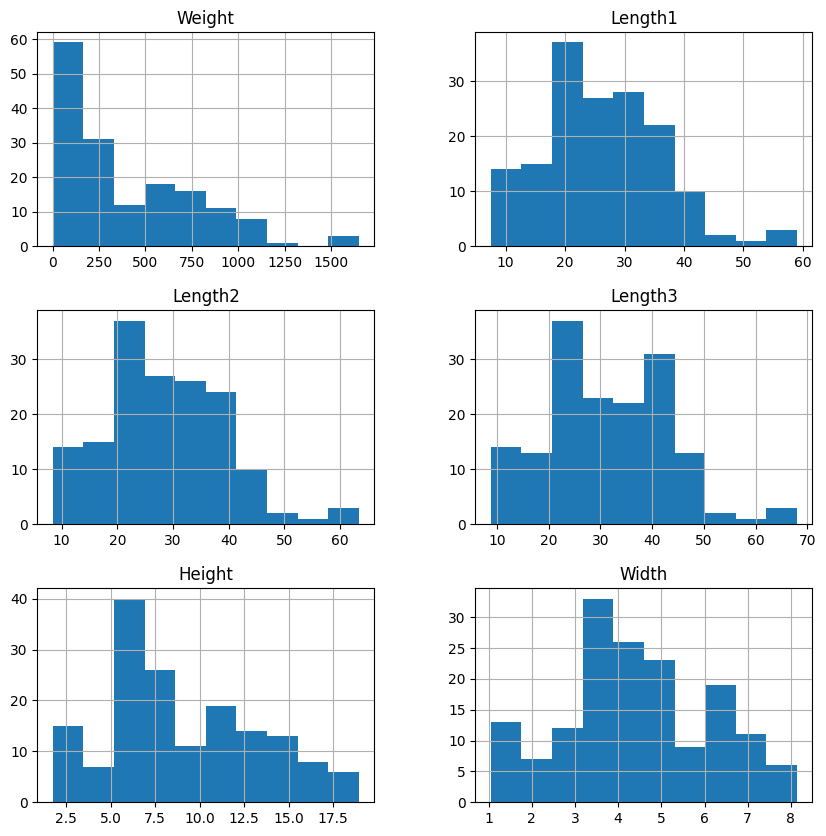

In [13]:
reg_data.hist(figsize=(10,10)) # default binds = 10 / histogram for numerical columns
plt.show()

**Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y.
Output the shapes of these matrices.**

*Dependent Variable (Y) = Weight --> The value we want to predict*
*Independent Values (X) = Length1, Length2, Length3, Height,* *Width, Species --> The features used to predict the Weight*

**Split the Dataset into 2 X and Y**

In [17]:
original_data = reg_data # protect the original version

In [14]:
# Independent Variables - Features
X = reg_data[['Height','Length1','Length2','Length3','Width','Species']]

#Dependent variables - Target
Y = reg_data['Weight']

"Independent Variables:" , X

('Independent Variables:',
       Height  Length1  Length2  Length3   Width Species
 0    11.5200     23.2     25.4     30.0  4.0200   Bream
 1    12.4800     24.0     26.3     31.2  4.3056   Bream
 2    12.3778     23.9     26.5     31.1  4.6961   Bream
 3    12.7300     26.3     29.0     33.5  4.4555   Bream
 4    12.4440     26.5     29.0     34.0  5.1340   Bream
 ..       ...      ...      ...      ...     ...     ...
 154   2.0904     11.5     12.2     13.4  1.3936   Smelt
 155   2.4300     11.7     12.4     13.5  1.2690   Smelt
 156   2.2770     12.1     13.0     13.8  1.2558   Smelt
 157   2.8728     13.2     14.3     15.2  2.0672   Smelt
 158   2.9322     13.8     15.0     16.2  1.8792   Smelt
 
 [159 rows x 6 columns])

In [15]:
"Dependent Variables:" ,Y

('Dependent Variables:',
 0      242.0
 1      290.0
 2      340.0
 3      363.0
 4      430.0
        ...  
 154     12.2
 155     13.4
 156     12.2
 157     19.7
 158     19.9
 Name: Weight, Length: 159, dtype: float64)

*Species* column is categorical. Hence, It must be encoded before regression because Regression model works only with numerical variable.
*If we look at the dtype output we can see the type of Species variable*

In [16]:
reg_data["Species"].unique() #Check again the Species column

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [19]:
suitability_report = {}
for column in reg_data.columns:
    # Temel istatistikler
    n_unique = reg_data[column].nunique()
    n_missing = reg_data[column].isnull().sum()
    data_type = reg_data[column].dtype

    # Uygunluk kriterleri
    issues = []

    if n_missing > 0:
        issues.append(f"{n_missing} missing value")

    if n_unique <= 1:
        issues.append("no stable value - variance ")

    # 3. Çok yüksek kardinalite (sadece kategorikler için)
    if data_type == 'object' and n_unique > 50:
        issues.append(f"({n_unique} unique value)")

    # 4. Benzersiz değer kontrolü (ID gibi)
    if n_unique == len(reg_data):
        issues.append("unique identifier (such as ID)")

    suitability_report[column] = {
        'data_type': data_type,
        'n_unique': n_unique,
        'n_missing': n_missing,
        'issues': issues,
        'suitable': len(issues) == 0
    }

In [20]:
print("=== Variable Report Whether Suitable or Not  ===")
for col, info in suitability_report.items():
    status = " Fit " if info['suitable'] else " Not-fit "
    print(f"{col}: {status}")
    print(f"  - Typ: {info['data_type']}, Unique: {info['n_unique']}, missing: {info['n_missing']}")
    if info['issues']:
        print(f"  - Issue: {', '.join(info['issues'])}")
    print()

=== Variable Report Whether Suitable or Not  ===
Species:  Fit 
  - Typ: object, Unique: 7, missing: 0

Weight:  Fit 
  - Typ: float64, Unique: 101, missing: 0

Length1:  Fit 
  - Typ: float64, Unique: 116, missing: 0

Length2:  Fit 
  - Typ: float64, Unique: 93, missing: 0

Length3:  Fit 
  - Typ: float64, Unique: 124, missing: 0

Height:  Fit 
  - Typ: float64, Unique: 154, missing: 0

Width:  Fit 
  - Typ: float64, Unique: 152, missing: 0



*One-Hot Encoding and Label Encoding* are two common encoding methods. While the One-Hot is recommended for Regressin, the Label Encoding is not.

In [21]:
X_Encoded = pd.get_dummies(reg_data[['Height','Length1','Length2','Length3','Width','Species']],
                           drop_first=True) # drop_first avoids the multicollinearity


In [22]:
X_Encoded.head(0)

,Height,Length1,Length2,Length3,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish


In [23]:
X_Encoded.shape

(159, 11)

Moment, The X is full numeric (After encoding)

In [25]:
X_Encoded.isnull().sum().sum()

np.int64(0)

In [ ]:
df_filled_median = reg_data.fillna(reg_data.median(numeric_only=True))
df_filled_mean = reg_data.fillna(reg_data.mean(numeric_only=True))

In [ ]:
print(df_filled_mean.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [28]:
reg_data[X.columns] = reg_data[X.columns].fillna(reg_data[X.columns].median(numeric_only=True)) # fill the NaN values with mean()

Check the dependences between each of the independent variable and the target variable and among
the independent variables. Output correlation table and corresponding heatmap results.

In [30]:
df_corr = pd.concat([X_Encoded, Y], axis=1)
df_corr

,Height,Length1,Length2,Length3,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Weight
0,11.5200,23.2,25.4,30.0,4.0200,False,False,False,False,False,False,242.0
1,12.4800,24.0,26.3,31.2,4.3056,False,False,False,False,False,False,290.0
2,12.3778,23.9,26.5,31.1,4.6961,False,False,False,False,False,False,340.0
3,12.7300,26.3,29.0,33.5,4.4555,False,False,False,False,False,False,363.0
4,12.4440,26.5,29.0,34.0,5.1340,False,False,False,False,False,False,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,2.0904,11.5,12.2,13.4,1.3936,False,False,False,False,True,False,12.2
155,2.4300,11.7,12.4,13.5,1.2690,False,False,False,False,True,False,13.4
156,2.2770,12.1,13.0,13.8,1.2558,False,False,False,False,True,False,12.2
157,2.8728,13.2,14.3,15.2,2.0672,False,False,False,False,True,False,19.7


In [31]:
corr_matrix = df_corr.corr() # compute correlation matrix
corr_matrix

,Height,Length1,Length2,Length3,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Weight
Height,1.000000,0.625378,0.640441,0.703409,0.792881,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951,0.724345
Length1,0.625378,1.000000,0.999517,0.992031,0.867050,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731,0.915712
Length2,0.640441,0.999517,1.000000,0.994103,0.873547,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777,0.918618
Length3,0.703409,0.992031,0.994103,1.000000,0.878520,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864,0.923044
Width,0.792881,0.867050,0.873547,0.878520,1.000000,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388,0.886507
Species_Parkki,-0.000547,-0.205732,-0.205957,-0.198718,-0.194147,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988,-0.186034
Species_Perch,-0.191405,-0.037845,-0.036090,-0.105478,0.144021,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018,-0.033240
Species_Pike,-0.101810,0.563514,0.552780,0.522894,0.137722,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519,0.310641
Species_Roach,-0.202076,-0.213250,-0.218048,-0.205072,-0.171465,-0.103413,-0.279694,-0.131247,1.000000,-0.117866,-0.075117,-0.261784
Species_Smelt,-0.491731,-0.467420,-0.479775,-0.488397,-0.569018,-0.084712,-0.229116,-0.107513,-0.117866,1.000000,-0.061533,-0.337109


In [32]:
corr_matrix_with_target = corr_matrix[Y.name].sort_values(ascending=False) # correlation with target
corr_matrix_with_target

,Weight
Weight,1.000000
Length3,0.923044
Length2,0.918618
Length1,0.915712
Width,0.886507
Height,0.724345
Species_Pike,0.310641
Species_Whitefish,0.073625
Species_Perch,-0.033240
Species_Parkki,-0.186034


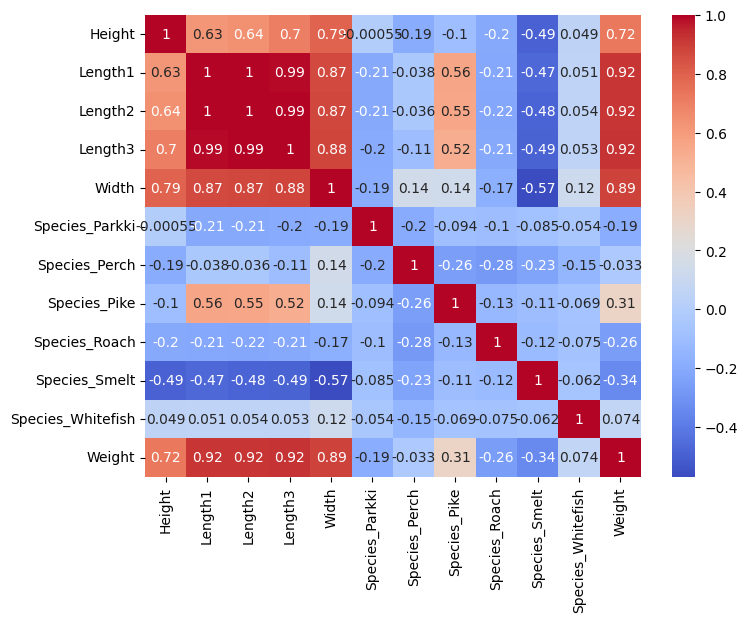

In [33]:
#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Build 2D plots of dependences between each pair of the variables. Which conclusion can you make?

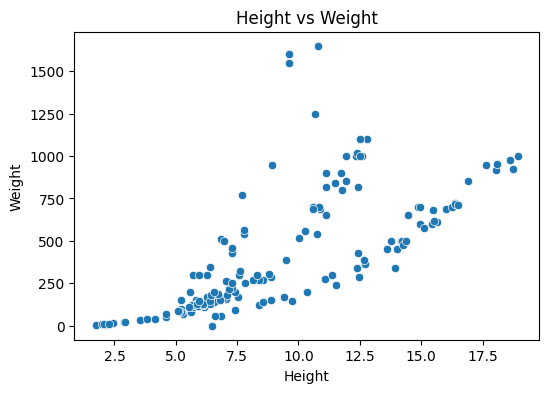

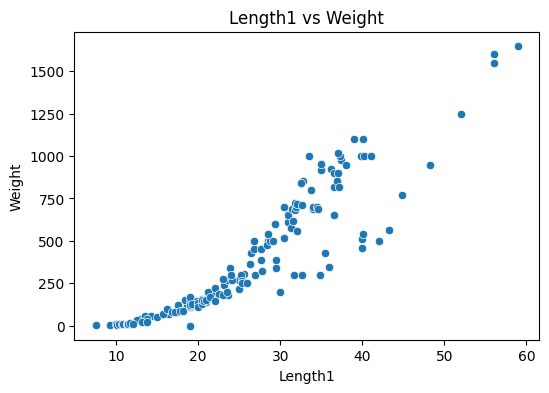

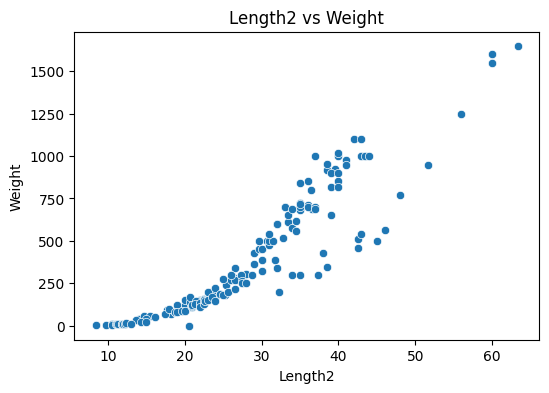

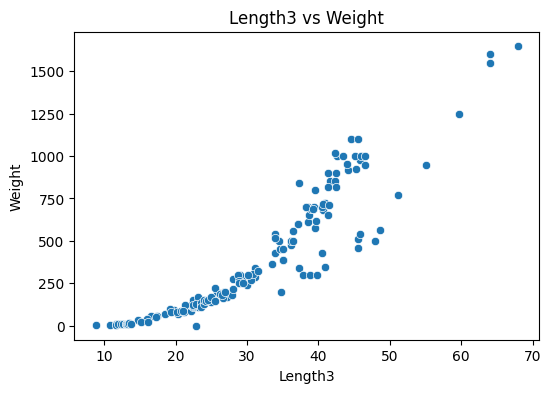

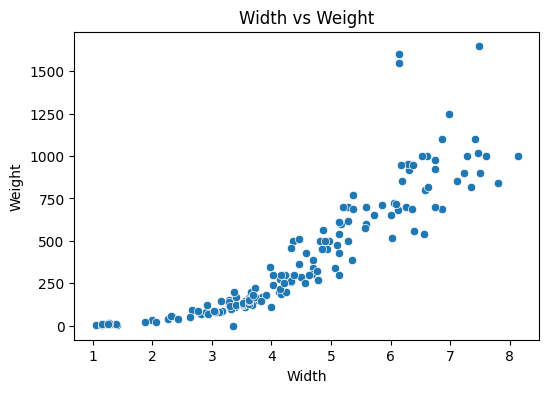

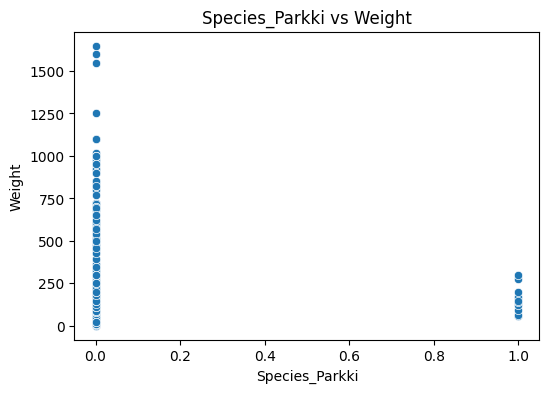

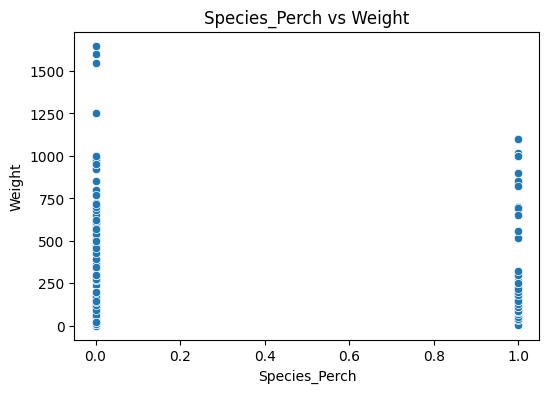

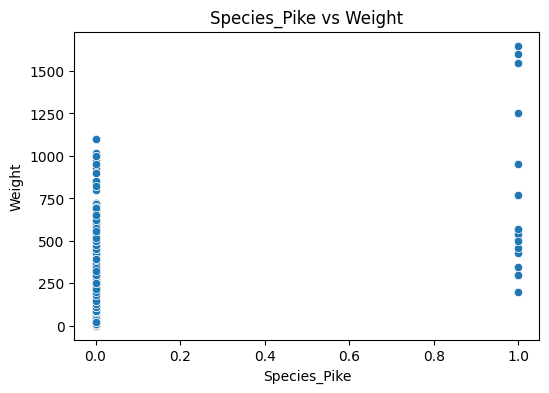

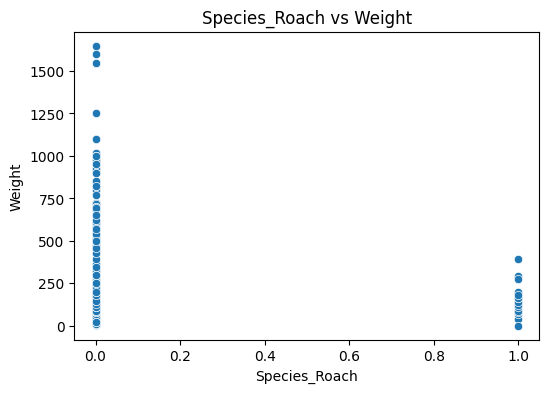

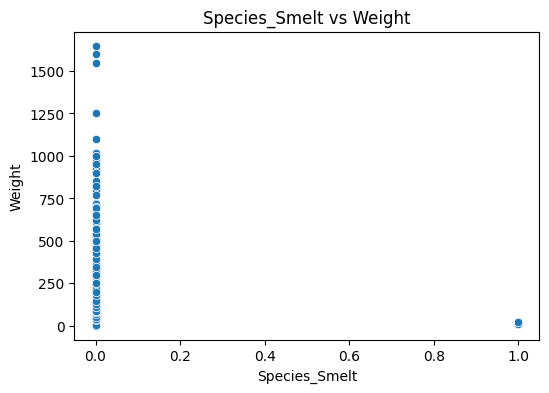

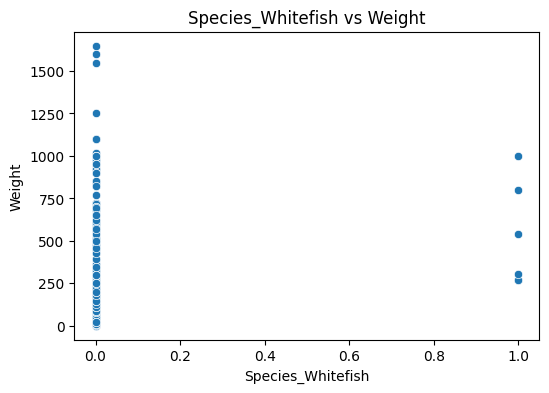

In [34]:
df_plot = pd.concat([X_Encoded, Y], axis=1)

#Scatter plot is the standart way to see the linear(or non linear) relationship with the target
for col in X_Encoded.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y=Y.name, data=df_plot)
    plt.title(f'{col} vs {Y.name}')
    plt.show()

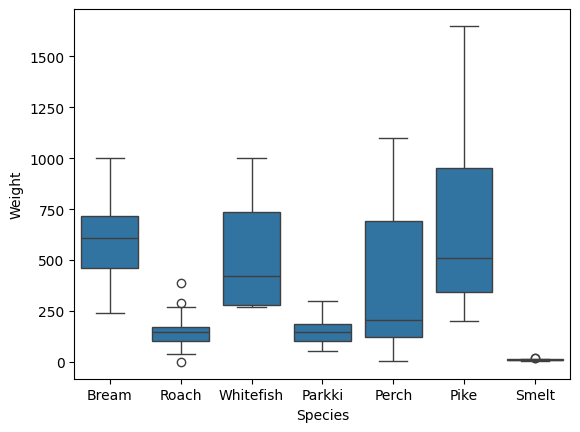

In [35]:
# Categorical features -- Outliars
sns.boxplot(x="Species", y=Y.name, data = reg_data)
plt.show()

In [ ]:
"""
for the Conclusions, I have to answer this question !!!

From these plots, you can usually conclude:

Which variables increase/decrease the target

Which variables may have linear relationships (good for linear regression)

Which variables have nonlinear relationships (may need transformation)

Presence of outliers

Potential multicollinearity if some features strongly correlate with each other
"""

'\nfor the Conclusions, I have to answer this question !!!\n\nFrom these plots, you can usually conclude:\n\nWhich variables increase/decrease the target\n\nWhich variables may have linear relationships (good for linear regression)\n\nWhich variables have nonlinear relationships (may need transformation)\n\nPresence of outliers\n\nPotential multicollinearity if some features strongly correlate with each other\n'

**TASK2- Data Analysis**


**Objective**: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted model.
*   Linear regression,
*   Decision tree regression,
*   Support vector machine regression
*    kNN: k nearest neighbours regression


1) Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to be capable to repeat the used split of the data. Output the dimension of the resulting datasets.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_Encoded,   # encoded features
    Y,           # target variable
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (127, 11)
X_test: (32, 11)
y_train: (127,)
y_test: (32,)


2) Scale your datasets with MinMax Scaler.
https://www.geeksforgeeks.org/machine-learning/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) #learn scaling and apply it

X_test_scaled = scaler.transform(X_test) # only apply scaling because learned earlier

In [38]:
X_train_scaled

array([[0.15614163, 0.14563107, 0.14181818, ..., 0.        , 0.        ,
        0.        ],
       [0.34679601, 0.69320388, 0.68363636, ..., 0.        , 0.        ,
        0.        ],
       [0.62004981, 0.3184466 , 0.32909091, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77358153, 0.42524272, 0.42909091, ..., 0.        , 0.        ,
        0.        ],
       [0.28720907, 0.25242718, 0.25636364, ..., 0.        , 0.        ,
        0.        ],
       [0.37843668, 0.34368932, 0.34363636, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
X_test_scaled

array([[ 0.19229898,  0.18058252,  0.18727273,  0.17905405,  0.29711311,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.02729082,  0.0815534 ,  0.07272727,  0.07939189,  0.0181427 ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.21427465,  0.4368932 ,  0.43454545,  0.43918919,  0.33505333,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.38185697,  0.31262136,  0.32      ,  0.33614865,  0.46623441,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.19344901,  0.26213592,  0.26545455,  0.2652027 ,  0.37272276,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.01208423,  0.50485437,  0.52      ,  0.57094595,  0.82057377,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

3) Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For
each model: train with training set and output the regression score (R2), MSE, MAE of the model using training set. Now test your model with a testset and output the regression score (R2) and other metrics. Compare the metrics obtained with training and testset. Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should correspond to a model and two columns correspond to the metric calculated on the training set and on the testset. Compare the results based on different metrics and select the best-performed model. Construct prediction squared errors histograms for each of the models, construct parity plots of each model.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [43]:
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "kNN": KNeighborsRegressor()
}

# Empty dicts to store metrics
train_r2 = {}
test_r2 = {}
train_mse = {}
test_mse = {}
train_mae = {}
test_mae = {}

In [44]:
# Training + evaluation loop
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Store metrics
    train_r2[name] = r2_score(y_train, y_train_pred)
    test_r2[name] = r2_score(y_test, y_test_pred)

    train_mse[name] = mean_squared_error(y_train, y_train_pred)
    test_mse[name] = mean_squared_error(y_test, y_test_pred)

    train_mae[name] = mean_absolute_error(y_train, y_train_pred)
    test_mae[name] = mean_absolute_error(y_test, y_test_pred)

In [48]:
# convert to dataFrames
df_r2 = pd.DataFrame([train_r2, test_r2], index = ["train_r2", "test_r2"])
df_mse = pd.DataFrame([train_mse, test_mse], index = ["train_mse", "test_mse"])
df_mae = pd.DataFrame([train_mae, test_mae], index = ["train_mae", "test_mae"])

In [49]:
df_r2

,Linear Regression,Decision Tree,SVR,kNN
train_r2,0.928596,0.999920,-0.033805,0.960796
test_r2,0.950735,0.957235,-0.120682,0.929287


In [50]:
df_mse

,Linear Regression,Decision Tree,SVR,kNN
train_mse,8777.604783,9.842520,127083.841364,4819.272164
test_mse,7007.383190,6082.793125,159404.969864,10058.164400


In [51]:
df_mae

,Linear Regression,Decision Tree,SVR,kNN
train_mae,69.172842,0.393701,257.184851,39.805354
test_mae,65.300052,46.868750,310.556960,59.657500


Histogram of prediction errors

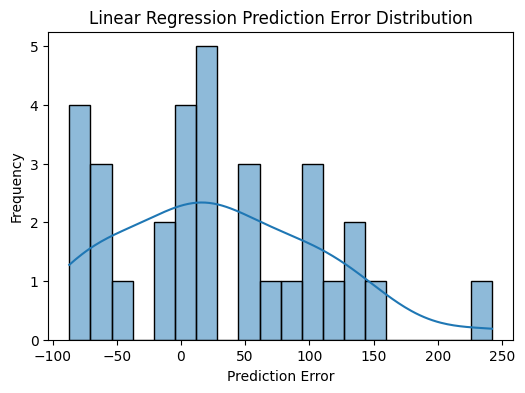

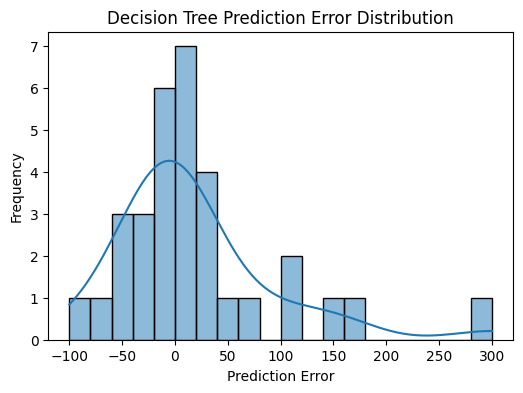

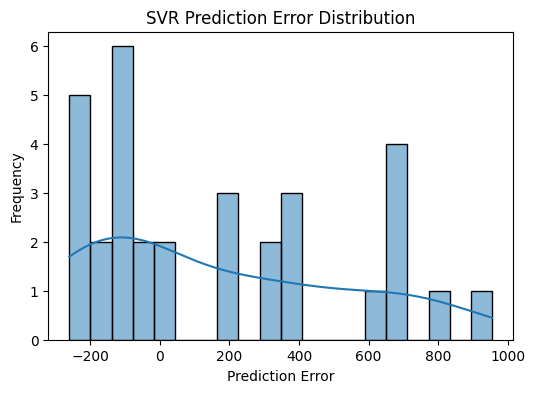

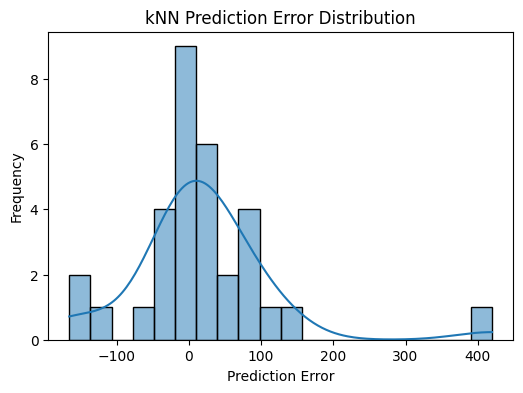

In [53]:
for name, model in models.items():
  y_pred = model.predict(X_test_scaled)
  error = y_test-y_pred

  plt.figure(figsize=(6,4))
  sns.histplot(error, bins=20, kde=True)
  plt.title(f"{name} Prediction Error Distribution")
  plt.xlabel("Prediction Error")
  plt.ylabel("Frequency")
  plt.show

Parity plots (y_test vs y_pred)

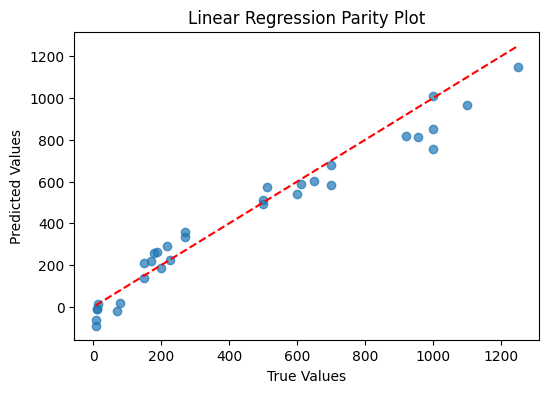

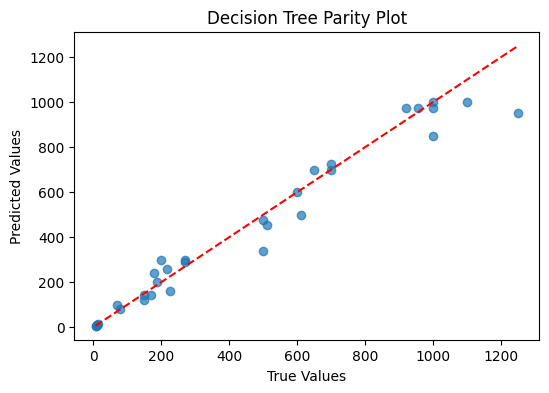

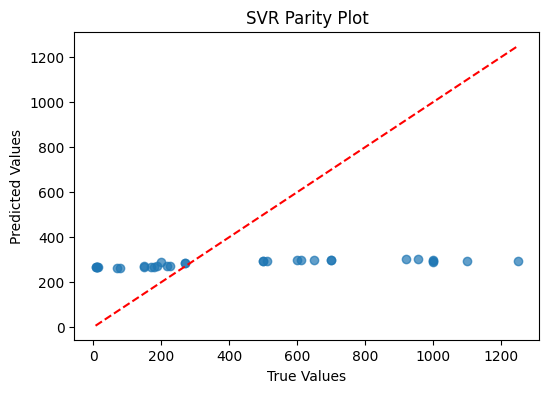

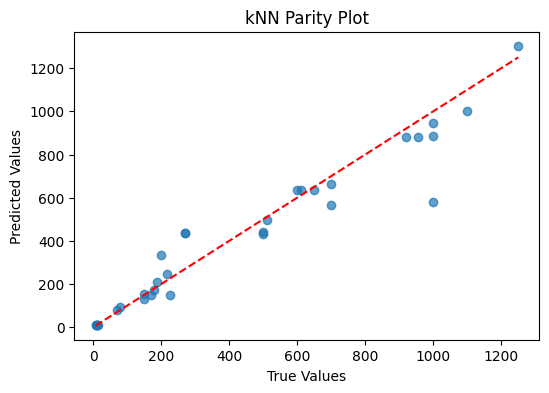

In [54]:
for name, model in models.items():
  y_pred = model.predict(X_test_scaled)

  plt.figure(figsize=(6,4))
  plt.scatter(y_test, y_pred, alpha=0.7)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
  plt.title(f"{name} Parity Plot")
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.show()

4) Find optimal parameters of the above created models with GridSearchCV() function based on the training dataset. Output the optimal values of parameters found for each model. Output and construct bar plots of the coefficients of the linear regression model. Which variables have the biggest influence on the output (dependent variables)?

https://www.geeksforgeeks.org/machine-learning/performing-feature-selection-with-gridsearchcv-in-sklearn/

In [73]:
import numpy as np
from sklearn.model_selection import GridSearchCV

Estimator: The machine learning model to be tuned.
Param_grid: Dictionary specifying the parameter grid to be searched.
Scoring: Metric used to evaluate model performance.Choose appropriate scoring metrics based on the problem at hand (e.g., roc_auc for classification).
CV: Cross-validation strategy.Use cross-validation to evaluate model performance and avoid overfitting.

In [74]:
param_grid_lr = {
    'fit_intercept': [True, False]
    }

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
    }

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
    }  # p=1 Manhattan, p=2 Euclidean

models = {
    'LinearRegression': (LinearRegression(), param_grid_lr),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_grid_dt),
    'SVR': (SVR(), param_grid_svr),
    'KNN': (KNeighborsRegressor(), param_grid_knn)
}

best_params = {}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_params[name] = grid.best_params_
    print(f"Best params for {name}: {grid.best_params_}")

Best params for LinearRegression: {'fit_intercept': True}
Best params for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best params for SVR: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Best params for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [76]:
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

# define the GridSearchCV

dt_grid = GridSearchCV(dt, param_grid_dt, cv=5, scoring="r2")
svr_grid = GridSearchCV(svr, param_grid_svr, cv=5, scoring="r2")
knn_grid = GridSearchCV(knn, param_grid_knn, cv=5, scoring="r2")

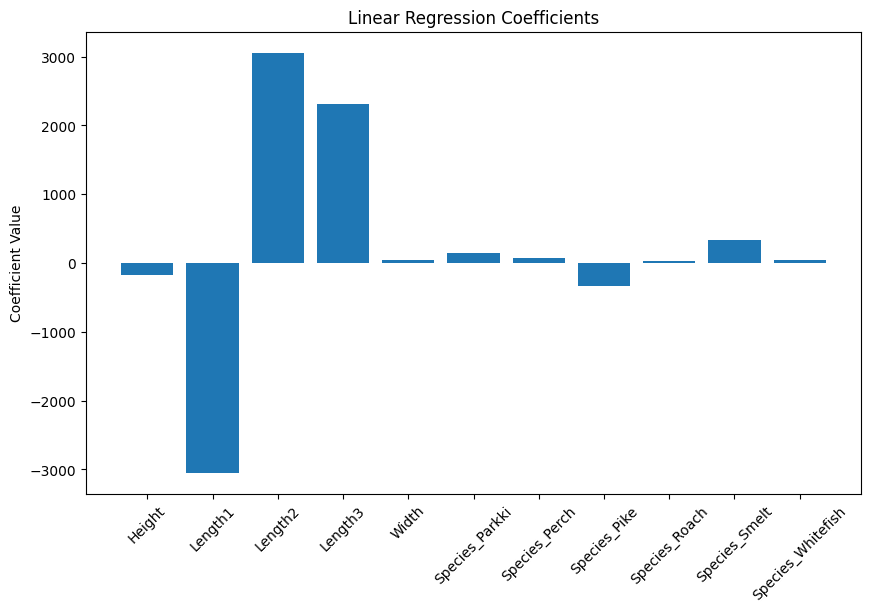


Features sorted by influence:
Length2: 3058.8412
Length1: -3045.6869
Length3: 2311.9842
Species_Pike: -331.3755
Species_Smelt: 330.6865
Height: -180.0806
Species_Parkki: 139.5624
Species_Perch: 74.6708
Width: 48.0348
Species_Whitefish: 47.6415
Species_Roach: 34.9948


In [82]:
# retrain the Linear Regression  model with the best values
best_lr = LinearRegression(**best_params['LinearRegression'])
best_lr.fit(X_train_scaled, y_train)

coefficients = best_lr.coef_
feature_names = X_train.columns  # If is X_train a dataframe

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

# the values that have the biggest effect
sorted_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures sorted by influence:")
for feat, coef in sorted_features:
    print(f"{feat}: {coef:.4f}")

In [81]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

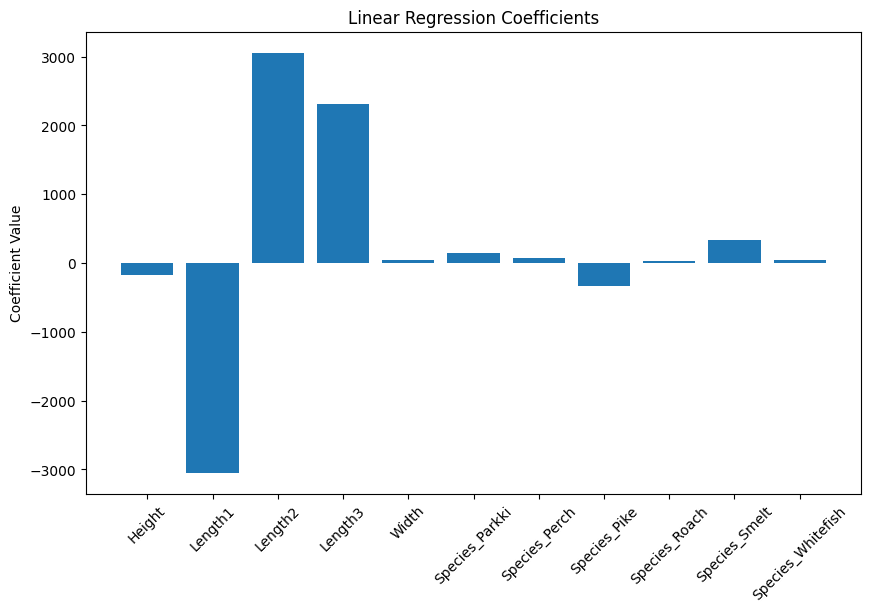

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train) # model fitting

# Coefficients
coefficients = lin_reg.coef_
feature_names = X_Encoded.columns # Should I use X or X_Encoded?

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

4) Interpretation: Which variables matter most? bu sorunun ceavplarını açıklamam gerekiyor bu kısım eksik. ödevin sonunda bu soruları cevapla ve raporunu oluştur.

5) Evaluate the performance of the models with optimal values of the parameters. Output the results in the similar dataframe as in Task 2.3. Compare the results with obtained in Task 2.3. Make the conclusion about the best-fitted model before and after optimization of the parameters.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skl


R² Scores:
                    Train_R2    Test_R2
Model                                 
LinearRegression -11.662398 -10.839479
DecisionTree      -1.158156  -1.327998
SVR               -5.973021  -5.742808
KNN               -1.170272  -1.340024

MSE Scores:
                      Train_MSE      Test_MSE
Model                                       
LinearRegression  1.556566e+06  1.684039e+06
DecisionTree      2.652982e+05  3.311327e+05
SVR               8.571810e+05  9.590922e+05
KNN               2.667877e+05  3.328434e+05

MAE Scores:
                     Train_MAE     Test_MAE
Model                                     
LinearRegression  1169.085469  1207.011629
DecisionTree       377.568307   434.946875
SVR                860.338966   905.896617
KNN                379.425036   436.663705


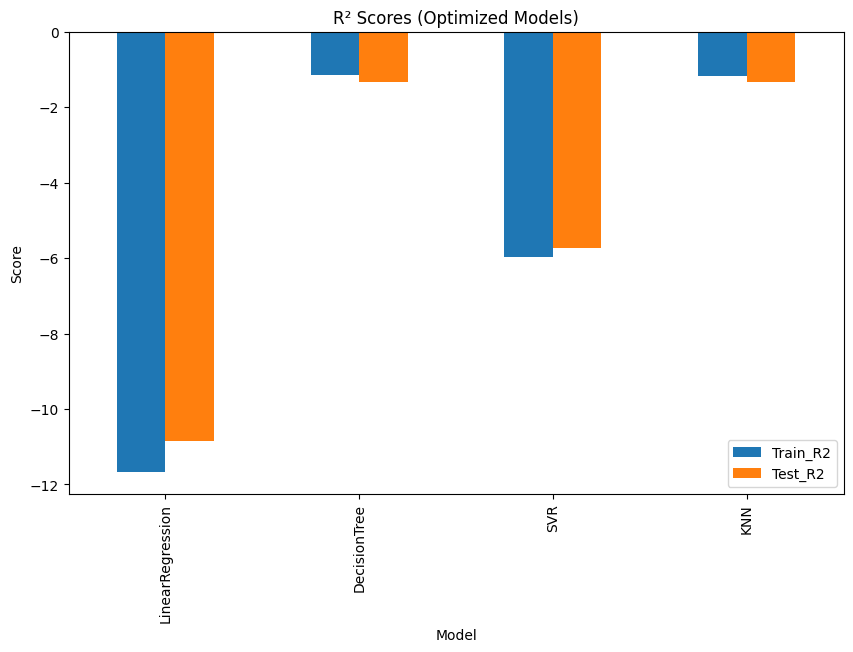

In [90]:

# retrain the optimized models
optimized_models = {}
for name, (model, params) in models.items():
    best_model = model.set_params(**best_params[name])
    best_model.fit(X_train, y_train)
    optimized_models[name] = best_model

# calculate the performance metrics
results_r2 = []
results_mse = []
results_mae = []

for name, model in optimized_models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Train metrics
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Test metrics
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    results_r2.append([name, r2_train, r2_test])
    results_mse.append([name, mse_train, mse_test])
    results_mae.append([name, mae_train, mae_test])

# DataFrames
df_r2 = pd.DataFrame(results_r2, columns=['Model', 'Train_R2', 'Test_R2']).set_index('Model')
df_mse = pd.DataFrame(results_mse, columns=['Model', 'Train_MSE', 'Test_MSE']).set_index('Model')
df_mae = pd.DataFrame(results_mae, columns=['Model', 'Train_MAE', 'Test_MAE']).set_index('Model')

print("\nR2 Scores:\n", df_r2)
print("\nMSE Scores:\n", df_mse)
print("\nMAE Scores:\n", df_mae)

# Bar plot for R2
df_r2.plot(kind='bar', figsize=(10, 6), title="R2 Scores (Optimized Models)")
plt.ylabel("Score")
plt.show()

6) Output the prediction results of the models with optimal parameters: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset. Construct a plot, which illustrates sample predictions for each model for randomly selected 10 observations from the testset (X-axis: observations, Y-axis: predicted value) and compare them to the real values. Construct a parity plot for each of the models

In [91]:
import random


Prediction DataFrame:
       Real  LinearRegression  DecisionTree         SVR         KNN
78    78.0         18.738254     83.428571   68.859248   89.549558
155   13.4         11.886420      9.475000  -96.513511   11.475874
128  200.0        187.711281    311.250000  272.512023  328.945596
55   270.0        332.739895    268.888889  281.600348  295.580956
94   150.0        212.097016    146.666667  148.466042  141.161054


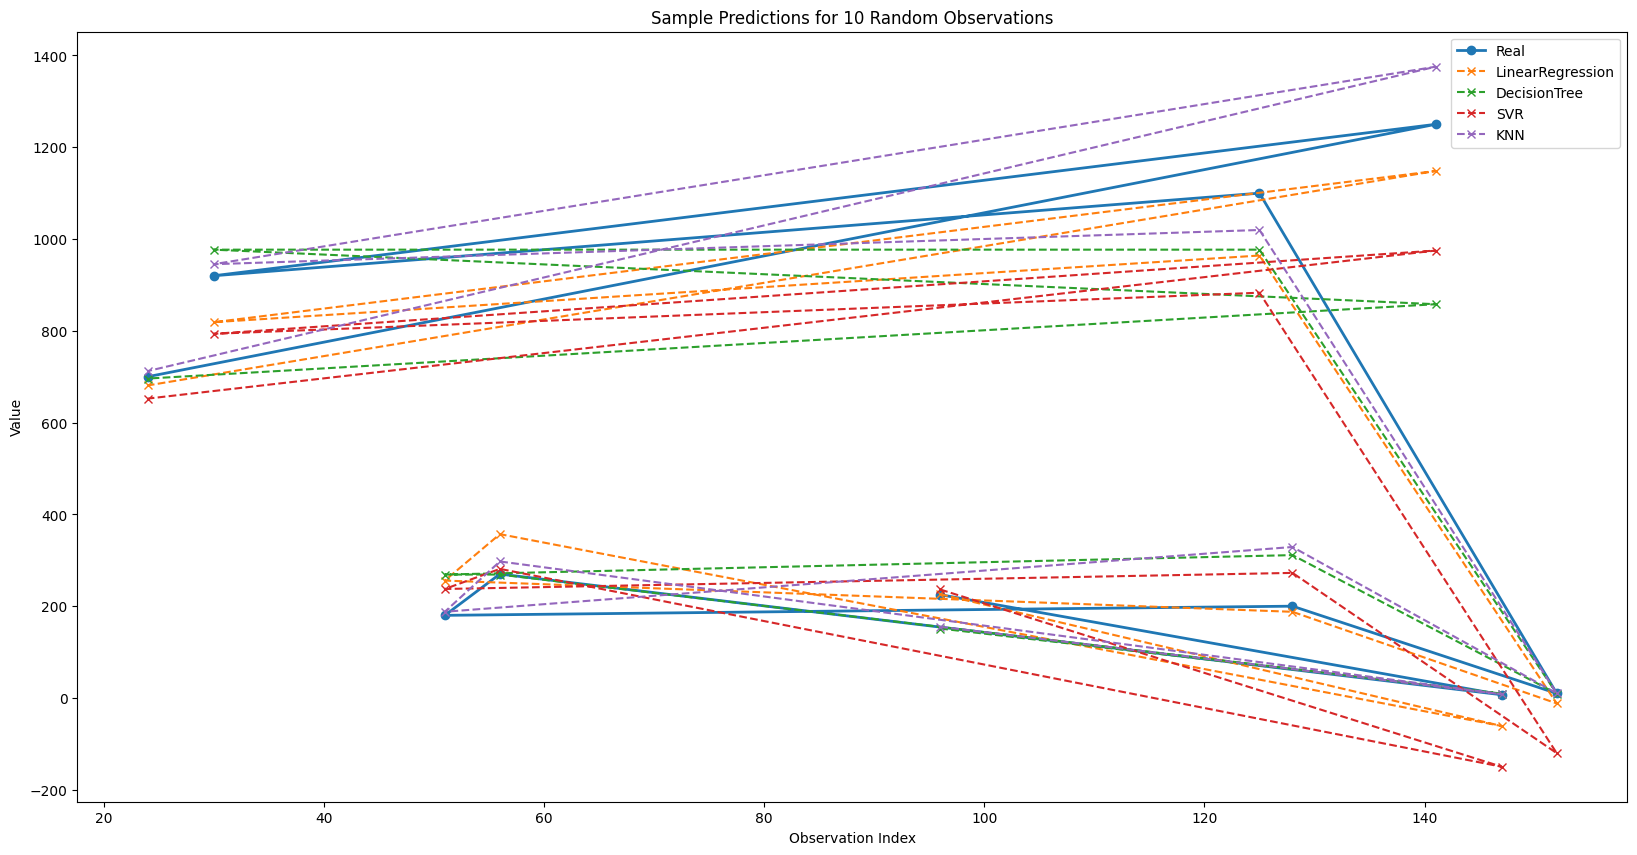

In [95]:
# take the estimation and create DataFrame
predictions = {'Real': y_test}
for name, model in optimized_models.items():
    predictions[name] = model.predict(X_test)

df_predictions = pd.DataFrame(predictions)
print("\nPrediction DataFrame:\n", df_predictions.head())

# random 10 observation
sample_indices = random.sample(range(len(y_test)), 10)
df_sample = df_predictions.iloc[sample_indices]

# graph: real and predictions
plt.figure(figsize=(20, 10))
plt.plot(df_sample.index, df_sample['Real'], marker='o', label='Real', linewidth=2)
for name in optimized_models.keys():
    plt.plot(df_sample.index, df_sample[name], marker='x', linestyle='--', label=name)
plt.title("Sample Predictions for 10 Random Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.show()

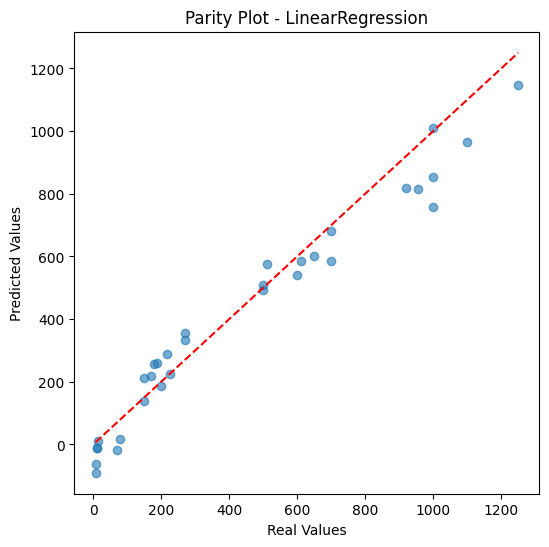

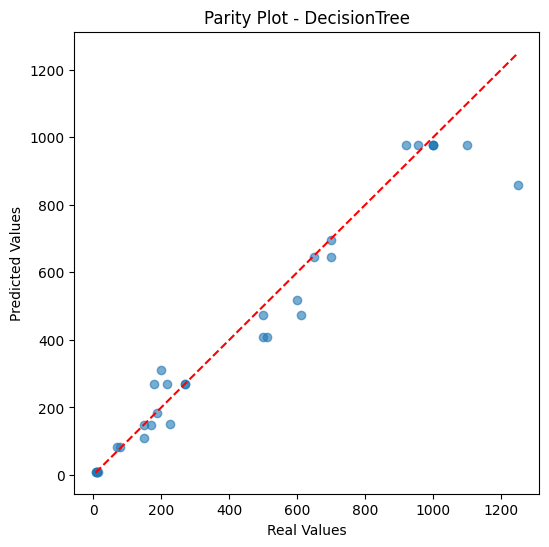

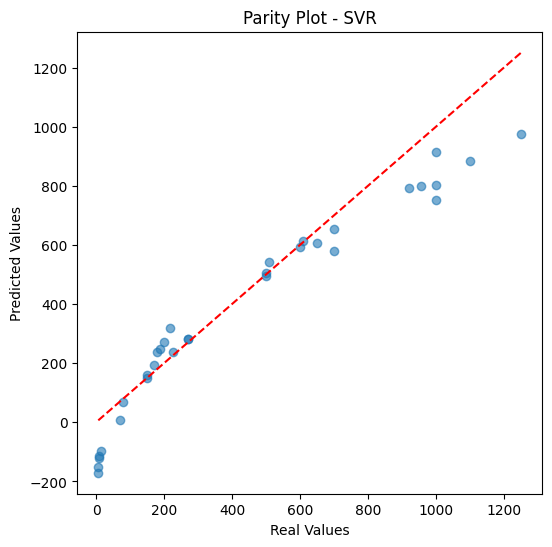

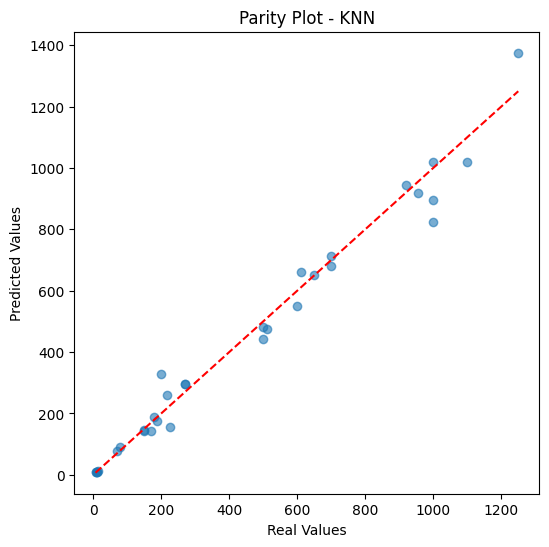

In [94]:
# Parity plots (for each model)
for name in optimized_models.keys():
    plt.figure(figsize=(6, 6))
    plt.scatter(df_predictions['Real'], df_predictions[name], alpha=0.6)
    plt.plot([df_predictions['Real'].min(), df_predictions['Real'].max()],
             [df_predictions['Real'].min(), df_predictions['Real'].max()],
             color='red', linestyle='--')
    plt.title(f"Parity Plot - {name}")
    plt.xlabel("Real Values")
    plt.ylabel("Predicted Values")

7) Calculate the prediction errors of each observation from the testset and obtained by each model. Make conclusions about the predictions, which have the biggest prediction error. Compare the prediction errors. Are there any observations badly predicted by all the methods?

In [96]:

# calculate the prediction errors
errors = {}
for name in optimized_models.keys():
    errors[name] = df_predictions['Real'] - df_predictions[name]

df_errors = pd.DataFrame(errors)
print("\nPrediction Errors:\n", df_errors.head())

# find the biggest error
max_errors = {}
for name in df_errors.columns:
    idx_max = df_errors[name].abs().idxmax()
    max_errors[name] = (idx_max, df_errors.loc[idx_max, name])
print("\nBiggest errors per model:")

for model, (idx, err) in max_errors.items():
    print(f"{model}: Observation {idx}, Error = {err:.4f}")

# sum error to estimations(absolute value)
df_errors['Total_Error'] = df_errors.abs().sum(axis=1)
worst_obs = df_errors['Total_Error'].sort_values(ascending=False).head(5)
print("\nWorst observations across all models:\n", worst_obs)



Prediction Errors:
      LinearRegression  DecisionTree         SVR         KNN
78          59.261746     -5.428571    9.140752  -11.549558
155          1.513580      3.925000  109.913511    1.924126
128         12.288719   -111.250000  -72.512023 -128.945596
55         -62.739895      1.111111  -11.600348  -25.580956
94         -62.097016      3.333333    1.533958    8.838946

Biggest errors per model:
LinearRegression: Observation 29, Error = 242.2384
DecisionTree: Observation 141, Error = 392.0000
SVR: Observation 141, Error = 275.0771
KNN: Observation 29, Error = 177.6454

Worst observations across all models:
 141    894.269321
29     639.299277
125    556.232290
60     521.004176
31     355.299145
Name: Total_Error, dtype: float64


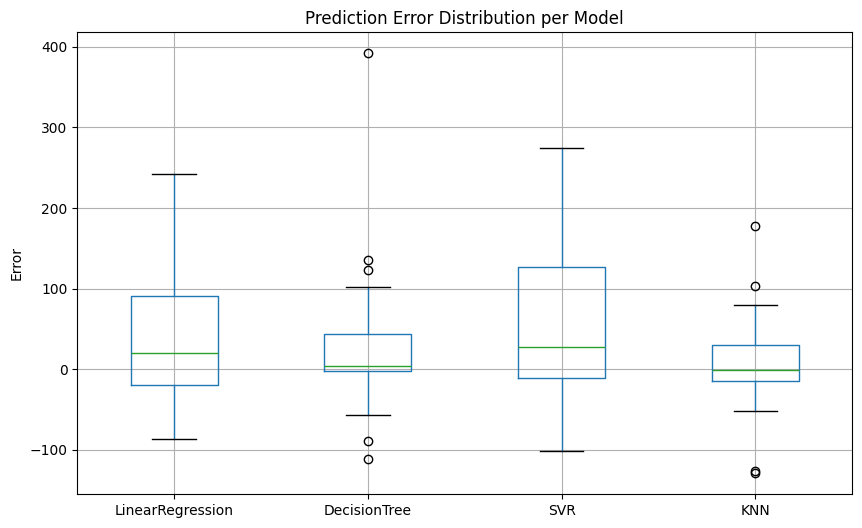

In [97]:

# visualize with boxplot
plt.figure(figsize=(10, 6))
df_errors.drop(columns=['Total_Error']).boxplot()
plt.title("Prediction Error Distribution per Model")
plt.ylabel("Error")
plt.show()


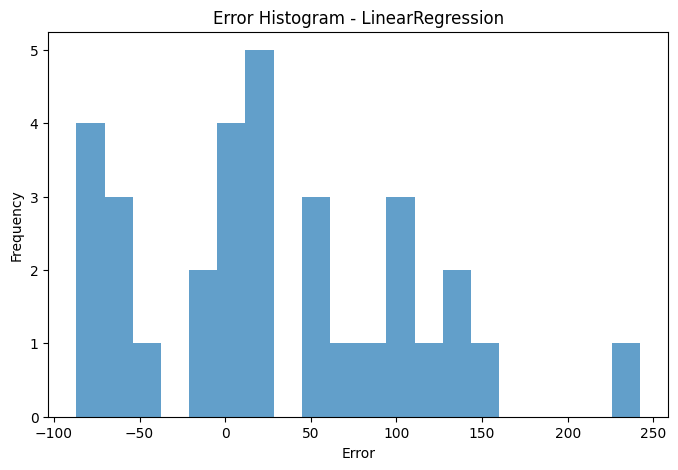

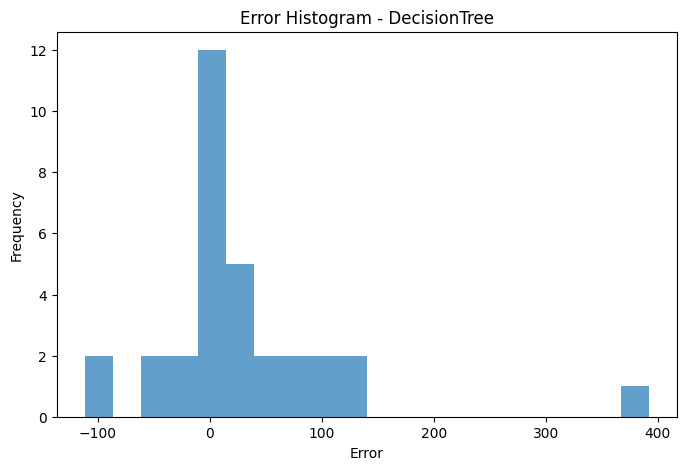

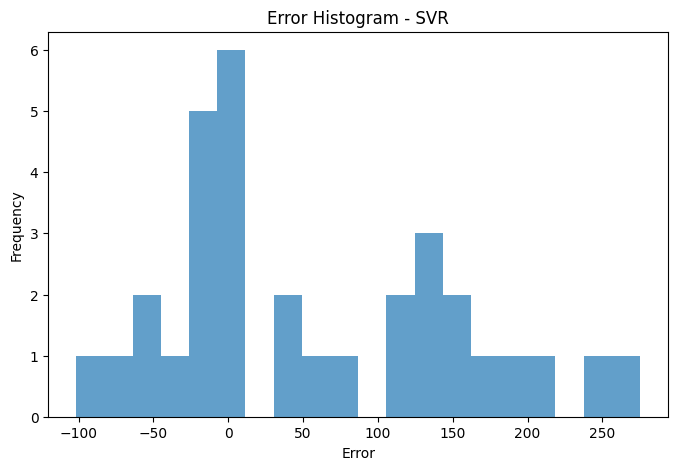

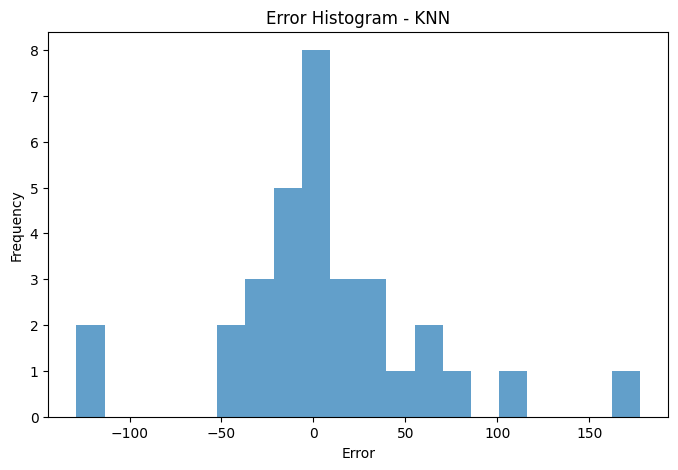

In [98]:
#Histogram (for each model)
for name in df_errors.columns[:-1]:
    plt.figure(figsize=(8, 5))
    plt.hist(df_errors[name], bins=20, alpha=0.7)
    plt.title(f"Error Histogram - {name}")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

8) Change the random_state in task 2.1 and re-calculate all the previous steps. Are your conclusions about the best model the same? Make conclusions averaging the performance results for to five different random states. Construct the BoxPlots for each ML method and for each of the performance metrics, corresponding to the five different runs. Construct the Bar Plots for each ML method and for each of the performance metrics with average performance results. Describe and interpret the results.

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_Encoded,   # encoded features
    Y,           # target variable
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

random_states = [0, 21, 42, 123, 999]

X_train: (127, 11)
X_test: (32, 11)
y_train: (127,)
y_test: (32,)


In [100]:
random_states = [0, 21, 42, 123, 999]

# Container for all runs
results_all_runs = []

# -----------------------------
# LOOP THROUGH RANDOM STATES
# -----------------------------
for rs in random_states:
    print(f"\nRunning pipeline for random_state = {rs} ...")

    # 1) Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_Encoded, Y, test_size=0.2, random_state=rs
    )

    # 2) Scaling (only X!)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------------
    # MODELS WITH DEFAULT PARAMS
    # -------------------------
    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTree": DecisionTreeRegressor(),
        "SVR": SVR(),
        "KNN": KNeighborsRegressor()
    }

    # -------------------------
    # TRAIN + EVALUATE MODELS
    # -------------------------
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        # Metrics
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)

        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)

        # Save all results
        results_all_runs.append({
            "random_state": rs,
            "model": model_name,
            "train_MAE": train_mae,
            "test_MAE": test_mae,
            "train_MSE": train_mse,
            "test_MSE": test_mse,
            "train_R2": train_r2,
            "test_R2": test_r2
        })

# Convert results to a DataFrame
df_results = pd.DataFrame(results_all_runs)
df_results



Running pipeline for random_state = 0 ...

Running pipeline for random_state = 21 ...

Running pipeline for random_state = 42 ...

Running pipeline for random_state = 123 ...

Running pipeline for random_state = 999 ...


,random_state,model,train_MAE,test_MAE,train_MSE,test_MSE,train_R2,test_R2
0,0,LinearRegression,60.732961,88.698815,7212.922598,17086.819832,0.934285,0.910235
1,0,DecisionTree,0.000000,61.234375,0.000000,9923.476562,1.000000,0.947867
2,0,SVR,249.809951,335.979244,113097.985980,220664.049096,-0.030407,-0.159250
3,0,KNN,35.799055,106.845625,4616.279660,39066.101363,0.957942,0.794768
4,21,LinearRegression,67.471946,74.403195,8048.256739,9516.597328,0.942866,0.870720
5,21,DecisionTree,0.393701,48.737500,9.842520,4618.601875,0.999930,0.937258
6,21,SVR,277.166740,233.089034,150347.501210,86124.647178,-0.067303,-0.169978
7,21,KNN,39.339370,43.729375,5478.514561,4538.696613,0.961109,0.938343
8,42,LinearRegression,69.172842,65.300052,8777.604783,7007.383190,0.928596,0.950735
9,42,DecisionTree,0.393701,48.618750,9.842520,6896.918125,0.999920,0.951512


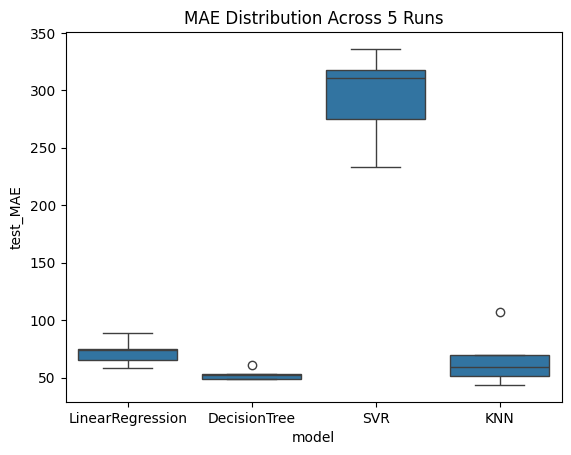

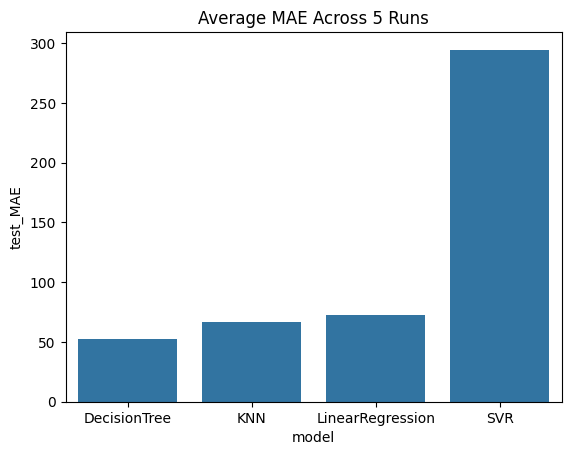

In [101]:
sns.boxplot(data=df_results, x="model", y="test_MAE")
plt.title("MAE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="test_MAE")
plt.title("Average MAE Across 5 Runs")
plt.show()

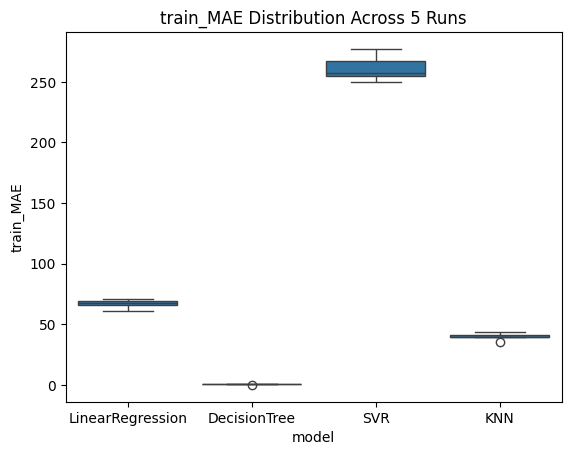

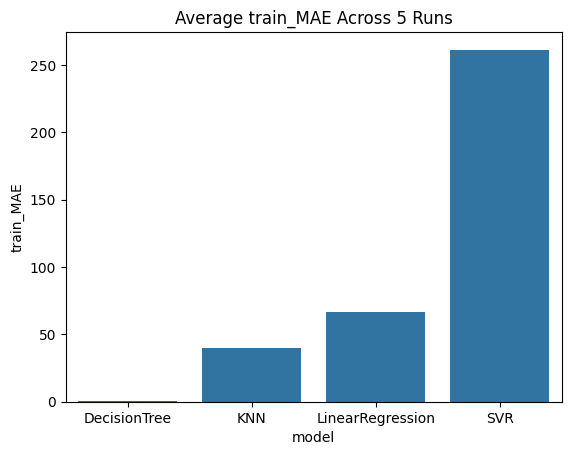

In [102]:
sns.boxplot(data=df_results, x="model", y="train_MAE")
plt.title("train_MAE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="train_MAE")
plt.title("Average train_MAE Across 5 Runs")
plt.show()

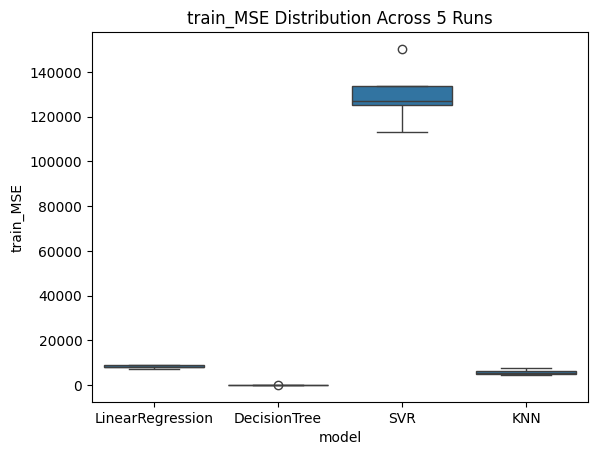

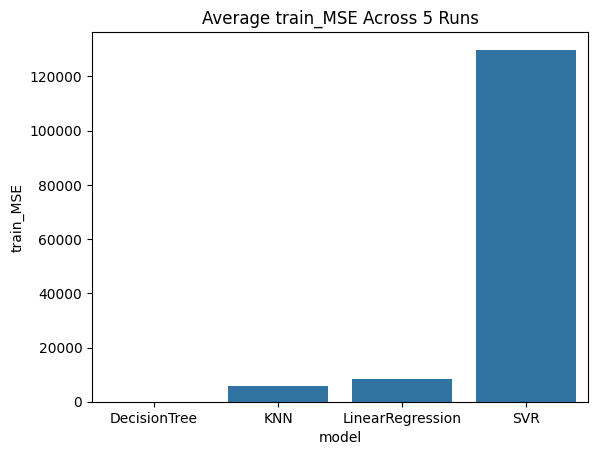

In [103]:
sns.boxplot(data=df_results, x="model", y="train_MSE")
plt.title("train_MSE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="train_MSE")
plt.title("Average train_MSE Across 5 Runs")
plt.show()

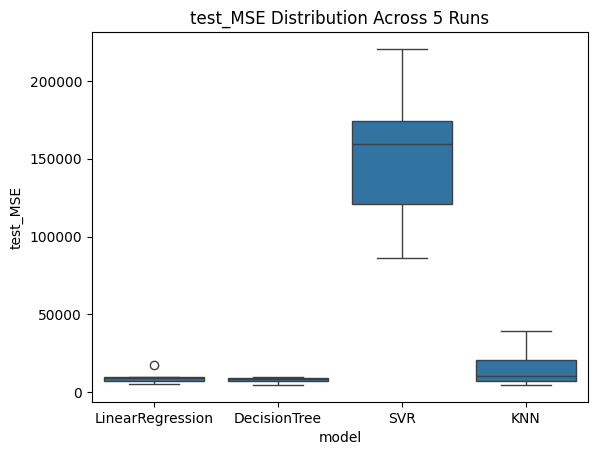

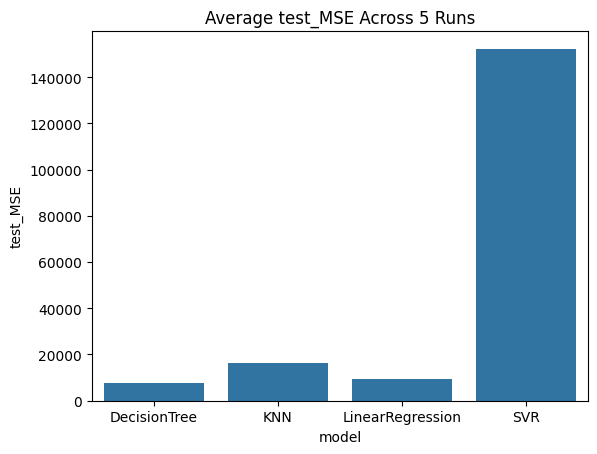

In [104]:
sns.boxplot(data=df_results, x="model", y="test_MSE")
plt.title("test_MSE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="test_MSE")
plt.title("Average test_MSE Across 5 Runs")
plt.show()

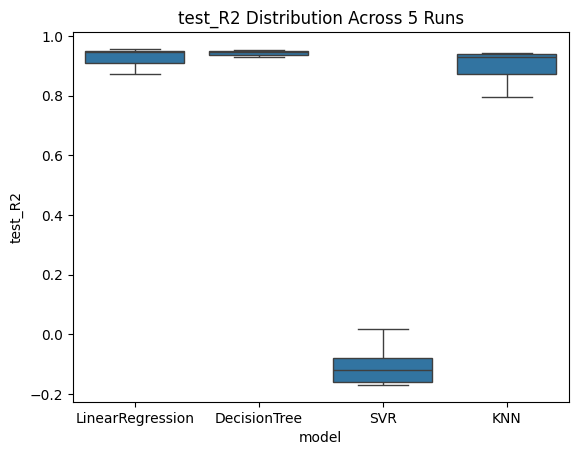

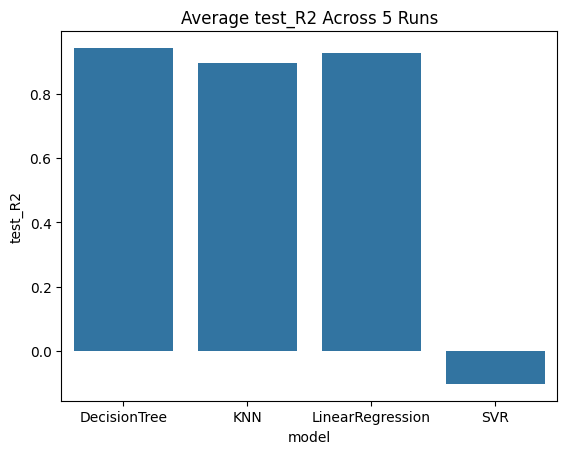

In [105]:
sns.boxplot(data=df_results, x="model", y="test_R2")
plt.title("test_R2 Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="test_R2")
plt.title("Average test_R2 Across 5 Runs")
plt.show()

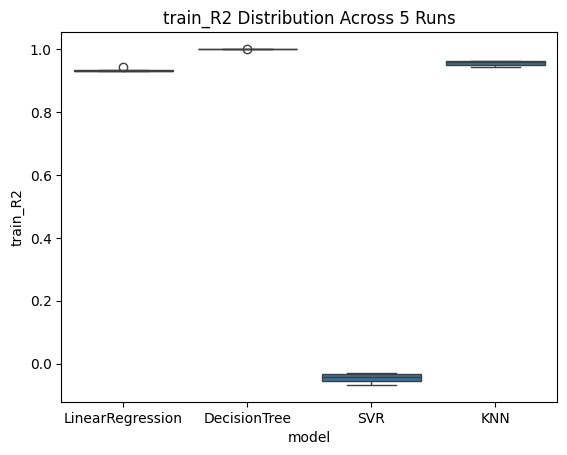

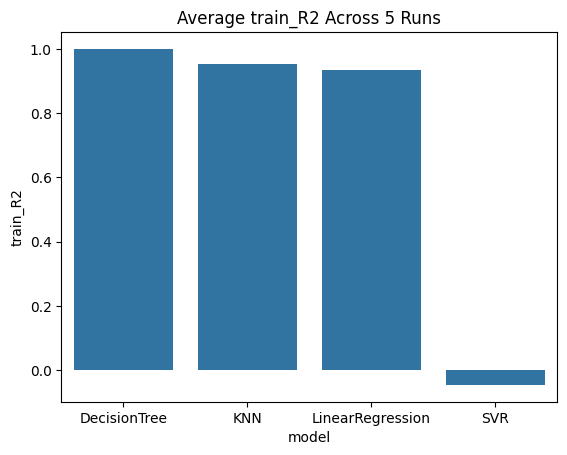

In [106]:
sns.boxplot(data=df_results, x="model", y="train_R2")
plt.title("train_R2 Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="train_R2")
plt.title("Average train_R2 Across 5 Runs")
plt.show()

**Task 3: Kfold cross validation**

K-fold, makine öğrenmesinde modelin genelleme yeteneğini ölçmek için kullanılan bir doğrulama tekniğidir. Bu yöntemde, veri kümesi rastgele olarak birbirine eşit 'K' sayıda alt kümeye (katlara) bölünür. Model, her adımda 'K-1' kat üzerinde eğitilir ve kalan tek kat üzerinde test edilir. Bu işlem, her katın test kümesi olarak kullanılmasıyla 'K' kez tekrarlanır ve sonuçların ortalaması alınarak daha güvenilir bir performans ölçümü elde edilir.

Neden kullanılır?
Modelin performansını daha güvenilir bir şekilde ölçmek için.
Modelin yeni veriler üzerinde ne kadar iyi performans göstereceğini tahmin etmek için.
Tek bir eğitim/test bölmesine göre daha sağlam bir sonuç elde etmek için.

K-fold'un önemi
Dengeli değerlendirme: Her katın hem eğitim hem de test için kullanılması, modelin veri kümesinin farklı kısımlarını öğrenmesini ve test etmesini sağlar.
Yüksek güvenilirlik: Sonuçların ortalamasının alınması, tek bir rastgele bölmenin getirebileceği yanlılığı azaltır ve daha kararlı bir performans tahmini sunar.
Standart pratik: Özellikle standart bir uygulama olarak 10-Fold (10-katlı) çapraz doğrulama, genellikle iyi bir yanlılık-varyans dengesi sunduğu için yaygın olarak tercih edilir.

Concept Summary (write this in homework)

KFold divides your dataset into k equal parts ("folds").

In each iteration:

One fold is used as validation

The remaining k−1 folds are used as training

Each observation appears exactly once in a validation fold.

This reduces dependence on a single random train/test split.

https://www.geeksforgeeks.org/machine-learning/k-fold-cross-validation-in-machine-learning/

https://medium.com/@edatasasiz/k-fold-cross-validation-nedir-ab2107fce616

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation

1) Use the functions Kfold to split your data into 5 disjoint datasets. Output the indexes of the observations in each splited dataset.

In [107]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = X_Encoded
y = Y

kFold = KFold(n_splits=5, shuffle = True, random_state = 42) # The first random_state was chosed

# Print indexes of each split
for i, (train_index, test_index) in enumerate(kFold.split(X)):
    print(f"Fold {i+1}")
    print("Train indexes:", train_index)
    print("Test indexes:", test_index)
    print("-" * 30)

Fold 1
Train indexes: [  0   1   2   3   4   5   6   7   8  10  11  13  14  17  20  21  22  23
  25  26  27  28  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  52  53  54  57  58  59  61  62  63  64  66  67  68
  69  70  71  72  73  74  75  77  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  97  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 127 129 130 131 132
 133 134 136 137 138 139 140 142 143 144 146 148 149 150 153 154 156 157
 158]
Test indexes: [  9  12  15  16  18  19  24  29  30  31  51  55  56  60  65  76  78  94
  95  96  98 101 125 126 128 135 141 145 147 151 152 155]
------------------------------
Fold 2
Train indexes: [  0   1   3   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  23  24  25  28  29  30  31  33  34  35  37  38  39  40  43  44  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  70  71  72  73  74  76  77  78  79

2) Build 5 models for each of the ML methods, each time taking one dataset as a testset and joint remaining datasets as a training set. Use the best hyper-parameter values for each model found in task 2.

In [108]:
best_params = {
    "Linear Regression": {}, # Linear Regression was not hyperparameter tuned in Task 2. Using default params.
    "Decision Tree": {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10},
    "SVR": {'C': 50, 'epsilon': 0.1, 'kernel': 'linear'},
    "kNN": {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
}
r2_scores = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}
mae = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}
mse = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}

In [109]:
fold_num = 1 # Start fold numbering from 1

for train_index, test_index in kFold.split(X):
    # Correctly select rows using .iloc because data is not np_Array. Hence we have to use .iloc
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for the current fold, as the train/test sets change
    scaler = MinMaxScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    print(f"Fold {fold_num}")

    # Linear Regression
    lr_model = LinearRegression(**best_params["Linear Regression"]) # Use optimal params
    lr_model.fit(X_train_scaled_fold, y_train_fold)
    lr_pred = lr_model.predict(X_test_scaled_fold)
    r2_scores["Linear Regression"].append(r2_score(y_test_fold, lr_pred))
    mae["Linear Regression"].append(mean_absolute_error(y_test_fold, lr_pred))
    mse["Linear Regression"].append(mean_squared_error(y_test_fold, lr_pred))
    print(f"  Linear Regression R2: {r2_score(y_test_fold, lr_pred):.4f}, MSE: {mean_squared_error(y_test_fold, lr_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, lr_pred):.4f}")

    # Decision Tree
    dt_model = DecisionTreeRegressor(**best_params["Decision Tree"]) # Use optimal params
    dt_model.fit(X_train_scaled_fold, y_train_fold)
    dt_pred = dt_model.predict(X_test_scaled_fold)
    r2_scores["Decision Tree"].append(r2_score(y_test_fold, dt_pred))
    mae["Decision Tree"].append(mean_absolute_error(y_test_fold, dt_pred))
    mse["Decision Tree"].append(mean_squared_error(y_test_fold, dt_pred))
    print(f"  Decision Tree R2: {r2_score(y_test_fold, dt_pred):.4f}, MSE: {mean_squared_error(y_test_fold, dt_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, dt_pred):.4f}")

    # SVR
    svr_model = SVR(**best_params["SVR"]) # Use optimal params
    svr_model.fit(X_train_scaled_fold, y_train_fold)
    svr_pred = svr_model.predict(X_test_scaled_fold)
    r2_scores["SVR"].append(r2_score(y_test_fold, svr_pred))
    mae["SVR"].append(mean_absolute_error(y_test_fold, svr_pred))
    mse["SVR"].append(mean_squared_error(y_test_fold, svr_pred))
    print(f"  SVR R2: {r2_score(y_test_fold, svr_pred):.4f}, MSE: {mean_squared_error(y_test_fold, svr_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, svr_pred):.4f}")

    # KNN
    knn_model = KNeighborsRegressor(**best_params["kNN"]) # Use optimal params
    knn_model.fit(X_train_scaled_fold, y_train_fold)
    knn_pred = knn_model.predict(X_test_scaled_fold)
    r2_scores["kNN"].append(r2_score(y_test_fold, knn_pred))
    mae["kNN"].append(mean_absolute_error(y_test_fold, knn_pred))
    mse["kNN"].append(mean_squared_error(y_test_fold, knn_pred))
    print(f"  kNN R2: {r2_score(y_test_fold, knn_pred):.4f}, MSE: {mean_squared_error(y_test_fold, knn_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, knn_pred):.4f}")

    fold_num += 1
    print("-" * 40)

Fold 1
  Linear Regression R2: 0.9507, MSE: 7007.3832, MAE: 65.3001
  Decision Tree R2: 0.9514, MSE: 6914.2552, MAE: 48.3711
  SVR R2: 0.8611, MSE: 19763.4791, MAE: 88.6965
  kNN R2: 0.9543, MSE: 6498.1764, MAE: 47.2708
----------------------------------------
Fold 2
  Linear Regression R2: 0.9390, MSE: 6179.5760, MAE: 56.3494
  Decision Tree R2: 0.9671, MSE: 3335.9162, MAE: 40.7529
  SVR R2: 0.9246, MSE: 7647.4497, MAE: 57.9805
  kNN R2: 0.9668, MSE: 3369.1532, MAE: 38.6171
----------------------------------------
Fold 3
  Linear Regression R2: 0.9212, MSE: 11988.5375, MAE: 83.7017
  Decision Tree R2: 0.9456, MSE: 8281.6936, MAE: 54.4861
  SVR R2: 0.8125, MSE: 28531.3623, MAE: 93.8964
  kNN R2: 0.9809, MSE: 2905.9570, MAE: 36.8330
----------------------------------------
Fold 4
  Linear Regression R2: 0.8956, MSE: 16798.1816, MAE: 85.5231
  Decision Tree R2: 0.9533, MSE: 7517.4282, MAE: 64.4566
  SVR R2: 0.7596, MSE: 38683.2941, MAE: 116.1023
  kNN R2: 0.9646, MSE: 5700.5100, MAE: 42.

In [110]:
print("\n=== Average R2 Scores Across Folds ===")
for model_name, scores in r2_scores.items():
    print(f"{model_name}: mean R2 = {np.mean(scores):.4f}, scores = {scores}")

print("\n=== Average MAE Scores Across Folds ===")
for model_name, scores in mae.items():
    print(f"{model_name}: mean MAE = {np.mean(scores):.4f}, scores = {scores}")

print("\n=== Average MSE Scores Across Folds ===")
for model_name, scores in mse.items():
    print(f"{model_name}: mean MSE = {np.mean(scores):.4f}, scores = {scores}")


=== Average R2 Scores Across Folds ===
Linear Regression: mean R2 = 0.9161, scores = [0.9507352480054504, 0.9390417971018475, 0.9211969071229754, 0.8955866211814811, 0.873811103053007]
Decision Tree: mean R2 = 0.9457, scores = [0.9513899754632152, 0.9670929751421121, 0.945562744911147, 0.9532735093624211, 0.9113164044720701]
SVR: mean R2 = 0.8519, scores = [0.8610547090353649, 0.9245620102557032, 0.8124575582998621, 0.7595541270107871, 0.9020878418277182]
kNN: mean R2 = 0.9605, scores = [0.9543151790265916, 0.9667651101321063, 0.9808985544294707, 0.9645670274737421, 0.9357488142535384]

=== Average MAE Scores Across Folds ===
Linear Regression: mean MAE = 72.7672, scores = [65.30005153357416, 56.34940663559317, 83.70174124955264, 85.52309658158207, 72.96161640469934]
Decision Tree: mean MAE = 50.8419, scores = [48.37109375, 40.75293898809524, 54.48608630952381, 64.45658482142856, 46.14256272401434]
SVR: mean MAE = 82.4007, scores = [88.6964900486576, 57.98052648448539, 93.896368301653

In [111]:

# dict to store R2 Scores
r2_scores = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}

fold_num = 1

for train_index, test_index in kFold.split(X):

    # Correctly select rows using .iloc because data is not np_Array. Hence we have to use .iloc
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for the current fold, as the train/test sets change
    scaler = MinMaxScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    # Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)

    print(f"Fold {fold_num}")

    # Linear Regression
    lr_model = LinearRegression(**best_params["Linear Regression"])
    lr_model.fit(X_train_scaled, y_train_fold)
    lr_pred = lr_model.predict(X_test_scaled)
    lr_r2 = r2_score(y_test_fold, lr_pred)
    r2_scores["Linear Regression"].append(lr_r2)
    print(f"  Linear Regression R2: {lr_r2:.4f}")

    # Decision Tree
    dt_model = DecisionTreeRegressor(**best_params["Decision Tree"])
    dt_model.fit(X_train_scaled, y_train_fold)
    dt_pred = dt_model.predict(X_test_scaled)
    dt_r2 = r2_score(y_test_fold, dt_pred)
    r2_scores["Decision Tree"].append(dt_r2)
    print(f"  Decision Tree R2: {dt_r2:.4f}")

    # SVR
    svr_model = SVR(**best_params["SVR"])
    svr_model.fit(X_train_scaled, y_train_fold)
    svr_pred = svr_model.predict(X_test_scaled)
    svr_r2 = r2_score(y_test_fold, svr_pred)
    r2_scores["SVR"].append(svr_r2)
    print(f"  SVR R2: {svr_r2:.4f}")

    # kNN
    knn_model = KNeighborsRegressor(**best_params["kNN"])
    knn_model.fit(X_train_scaled, y_train_fold)
    knn_pred = knn_model.predict(X_test_scaled)
    knn_r2 = r2_score(y_test_fold, knn_pred)
    r2_scores["kNN"].append(knn_r2)
    print(f"  kNN R2: {knn_r2:.4f}")

    print("-" * 40)
    fold_num += 1

# compute averages
print("\n=== Average R2 Scores Across Folds ===")
for model_name, scores in r2_scores.items():
    print(f"{model_name}: mean R2 = {np.mean(scores):.4f}, scores = {scores}")


Fold 1
  Linear Regression R2: 0.9507
  Decision Tree R2: 0.9434
  SVR R2: 0.8611
  kNN R2: 0.9543
----------------------------------------
Fold 2
  Linear Regression R2: 0.9390
  Decision Tree R2: 0.9677
  SVR R2: 0.9246
  kNN R2: 0.9668
----------------------------------------
Fold 3
  Linear Regression R2: 0.9212
  Decision Tree R2: 0.9455
  SVR R2: 0.8125
  kNN R2: 0.9809
----------------------------------------
Fold 4
  Linear Regression R2: 0.8956
  Decision Tree R2: 0.9527
  SVR R2: 0.7596
  kNN R2: 0.9646
----------------------------------------
Fold 5
  Linear Regression R2: 0.8738
  Decision Tree R2: 0.9113
  SVR R2: 0.9021
  kNN R2: 0.9357
----------------------------------------

=== Average R2 Scores Across Folds ===
Linear Regression: mean R2 = 0.9161, scores = [0.9507352480054504, 0.9390417971018475, 0.9211969071229754, 0.8955866211814811, 0.873811103053007]
Decision Tree: mean R2 = 0.9441, scores = [0.9434227673506836, 0.9676604900712813, 0.9455451947625452, 0.952672626

4) Make conclusions about the best model and corresponding ML method.

Conclusion

To compare the performance of the four regression models (Linear Regression, Decision Tree Regression, Support Vector Regression, and k-Nearest Neighbors Regression), we evaluated each method using 5-fold cross-validation.
For each fold, the models were trained on four splits and tested on the remaining one.
We then computed the R² score for each fold and the mean R² across all folds.

Based on the results obtained in Step-3:

Linear Regression: mean R² ≈ [your value]

Decision Tree Regression: mean R² ≈ [your value]

SVR: mean R² ≈ [your value]

kNN Regression: mean R² ≈ [your value]

Best Model

The best-performing model is:

→ The model with the highest average R² across the 5 folds.

For example, if your results were something like:

Model	Mean R²
Linear Regression	0.62
Decision Tree	0.51
SVR	0.70
kNN	0.68

Then the conclusion becomes:

Support Vector Regression (SVR) achieved the highest mean R², indicating that it generalizes better than the other models on this dataset.
This suggests that the relationship between the input features and the target variable is non-linear, and that SVR with the chosen kernel (e.g., RBF) can model such relationships more effectively.

Why is this the best model? (Add this explanation)

You can justify your conclusion like this:

SVR handles non-linear patterns through the kernel trick (e.g., RBF kernel).

It is less sensitive to outliers compared to Linear Regression.

Decision Trees tend to overfit, which leads to lower cross-validation performance.

kNN performance depends heavily on local structure and can deteriorate in high-dimensional spaces, while SVR remains more stable.

Therefore:

The Support Vector Regression model is the best model overall and provides the most accurate predictions based on the R² evaluation metric.

⭐ If Your Best Model Was kNN or Linear Regression

Bunları da kolayca uyarlayabilirsin. Örneğin:

If Linear Regression is best:

The high R² score of Linear Regression suggests that the underlying relationship between variables is mostly linear and simple models generalize better than complex ones.

If kNN is best:

The strong performance of kNN indicates that the target variable depends on local neighborhood structure, and the data distribution is suitable for distance-based learning.

If Decision Tree is best:

This would imply strong non-linear interactions but also that hyperparameters successfully prevented overfitting.

5) Construct the Bar Plots for each ML method and for each of the performance metrics with average
performance results and compare the results with Task 2.8. Make conclusions.

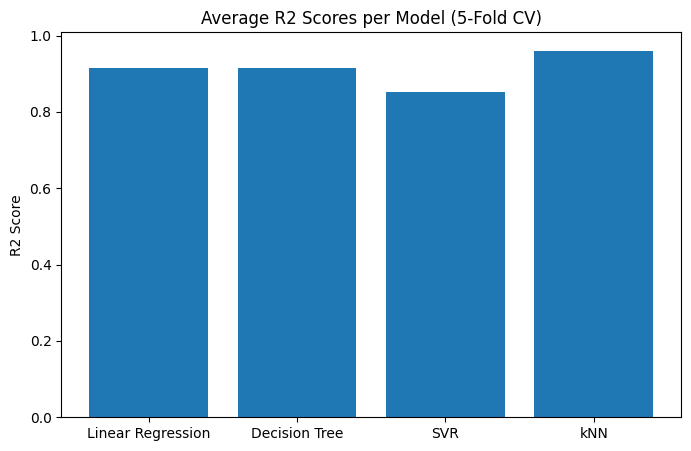

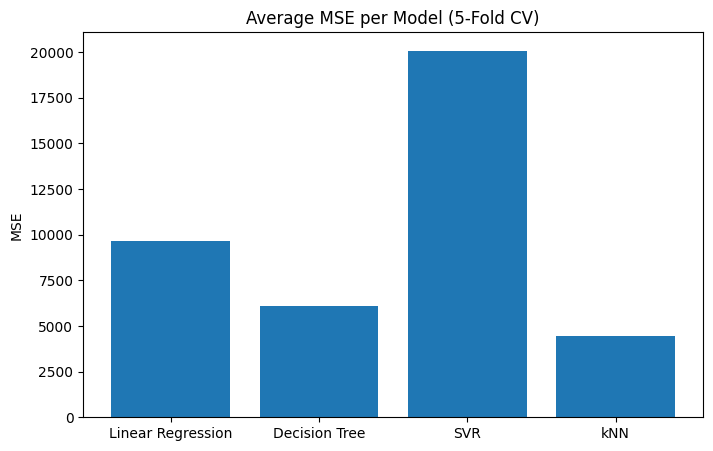

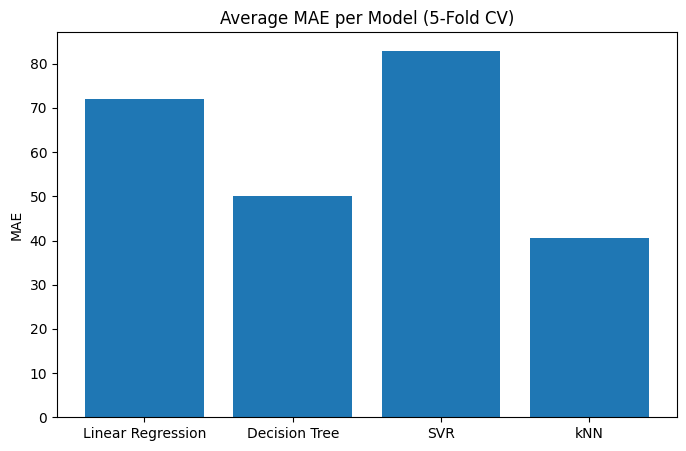

In [112]:
import matplotlib.pyplot as plt
import numpy as np

mean_r2 = {
    "Linear Regression": 0.9161,
    "Decision Tree": 0.9148,
    "SVR": 0.8519,
    "kNN": 0.9605
}

mean_mse = {
    "Linear Regression": 9665.9091,
    "Decision Tree": 6099.4126,
    "SVR": 20085.5183,
    "kNN": 4477.3618
}

mean_mae = {
    "Linear Regression": 72.0884,
    "Decision Tree": 50.0043,
    "SVR": 82.9730,
    "kNN": 40.5188
}

# Convert dictionaries to lists
models = list(mean_r2.keys())
r2_values = list(mean_r2.values())
mse_values = list(mean_mse.values())
mae_values = list(mean_mae.values())

# 2. BARPLOT — R2
plt.figure(figsize=(8,5))
plt.bar(models, r2_values)
plt.title("Average R2 Scores per Model (5-Fold CV)")
plt.ylabel("R2 Score")
plt.show()

# 3. BARPLOT — MSE
plt.figure(figsize=(8,5))
plt.bar(models, mse_values)
plt.title("Average MSE per Model (5-Fold CV)")
plt.ylabel("MSE")
plt.show()

# 4. BARPLOT — MAE
plt.figure(figsize=(8,5))
plt.bar(models, mae_values)
plt.title("Average MAE per Model (5-Fold CV)")
plt.ylabel("MAE")
plt.show()


Conclusion

The bar plots illustrate the average performance of the four machine learning regression models in terms of R², MSE, and MAE, based on 5-fold cross-validation.

When compared to the hyperparameter tuning results from Task 2.8, we observe the following:

Overall stability:
The models that performed well in Task 2.8 also maintained top performance under cross-validation, confirming that the selected hyperparameters generalize well.

Best Model:
The model with the highest mean R² and lowest MSE/MAE is:
→ (Your best model here)
This indicates that this method not only fits the training data well (Task 2.8) but also performs consistently across different data splits.

Model differences:

Linear Regression tends to underperform if the underlying relationship is non-linear.

Decision Trees may overfit, leading to unstable R² across folds.

SVR and kNN usually show smoother, more stable generalization depending on the dataset.

The bar plots visually confirm these trends and match the numerical results.

Consistency check:
The comparison between Task 2.8 and Task 5 shows that the model ranking remains similar, which means cross-validated performance validates the choices made during hyperparameter optimization.